In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/gapminder.csv')

In [3]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [4]:
import matplotlib.pyplot as plt

In [5]:
aus = df[df['country'] == 'Australia']

In [6]:
aus

,country,continent,year,lifeExp,pop,gdpPercap
60,Australia,Oceania,1952,69.120,8691212,10039.59564
61,Australia,Oceania,1957,70.330,9712569,10949.64959
62,Australia,Oceania,1962,70.930,10794968,12217.22686
63,Australia,Oceania,1967,71.100,11872264,14526.12465
64,Australia,Oceania,1972,71.930,13177000,16788.62948
65,Australia,Oceania,1977,73.490,14074100,18334.19751
66,Australia,Oceania,1982,74.740,15184200,19477.00928
67,Australia,Oceania,1987,76.320,16257249,21888.88903
68,Australia,Oceania,1992,77.560,17481977,23424.76683
69,Australia,Oceania,1997,78.830,18565243,26997.93657


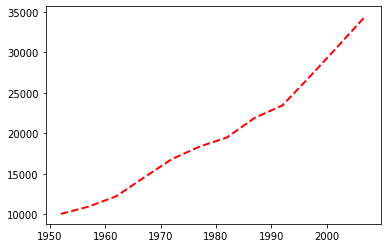

In [7]:
# First the matlab-y way

plt.plot(aus['year'], aus['gdpPercap'], 'r--', linewidth = 2)

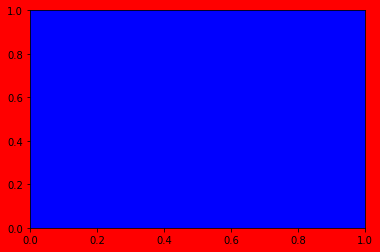

In [8]:
# the python-y way

fig, ax = plt.subplots()

fig.set_facecolor('red')
ax.set_facecolor('blue')

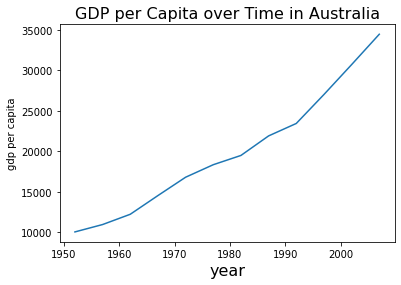

In [9]:
fig, ax = plt.subplots()

ax.plot(aus['year'], aus['gdpPercap'])
ax.set_title('GDP per Capita over Time in Australia', fontsize = 16)
ax.set_xlabel('year', fontsize = 16)
ax.set_ylabel('gdp per capita')

plt.savefig('my_first_fig.pdf')

what if i want two lines on one figure?

In [10]:
nz = df[df['country'] == 'New Zealand']

In [11]:
nz.head()

,country,continent,year,lifeExp,pop,gdpPercap
1092,New Zealand,Oceania,1952,69.39,1994794,10556.57566
1093,New Zealand,Oceania,1957,70.26,2229407,12247.39532
1094,New Zealand,Oceania,1962,71.24,2488550,13175.67800
1095,New Zealand,Oceania,1967,71.52,2728150,14463.91893
1096,New Zealand,Oceania,1972,71.89,2929100,16046.03728


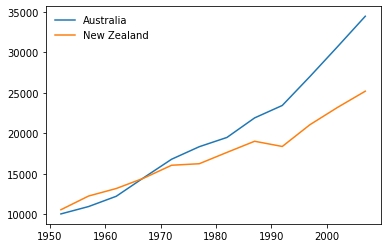

In [12]:
fig, ax = plt.subplots()

ax.plot(aus['year'], aus['gdpPercap'])
ax.plot(nz['year'], nz['gdpPercap'])
ax.legend(['Australia', 'New Zealand'], frameon = False)


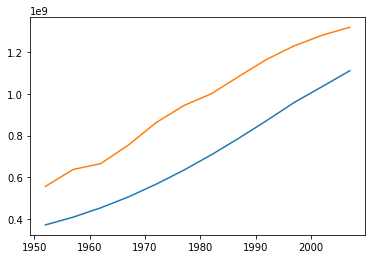

In [13]:
india = df[df['country'] == 'India']
china = df[df['country'] == 'China']

fig, ax = plt.subplots()

ax.plot(india['year'], india['pop'])
ax.plot(china['year'], china['pop'])

In [14]:
plotting_df = df[(df['country'] == 'India') | (df['country'] == 'China')]

In [15]:
grp_df = plotting_df.groupby('country')

my_cols = {
    'India': 'green',
    'China': 'red'
}

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


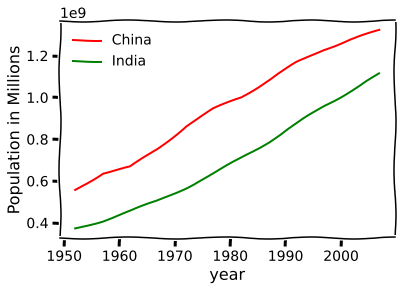

In [16]:
with plt.xkcd():
    fig, ax = plt.subplots()

    for iName, iGroup in grp_df:
        ax.plot(iGroup['year'], iGroup['pop'], label = iName, color = my_cols[iName])

    ax.set_ylabel('Population in Millions', fontsize = 16)
    ax.set_xlabel('year', fontsize = 16)

    ax.legend(frameon = False)

    plt.savefig('pop_plot.jpg', dpi = 300)



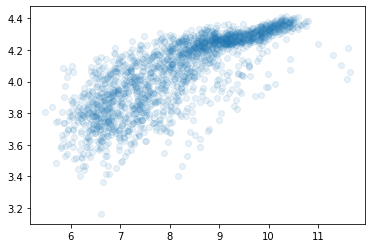

In [17]:
from numpy import log as my_log

# scatterplot 
fig, ax = plt.subplots()

ax.scatter(my_log(df['gdpPercap']), my_log(df['lifeExp']), alpha = 0.1)


In [18]:
grp_df = df.groupby('continent')

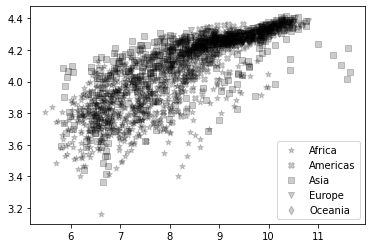

In [19]:
my_markers = {
    'Africa': '*',
    'Americas': 'X', 
    'Europe': 'v', 
    'Asia': 's',
    'Oceania': 'd'
}

fig, ax = plt.subplots()

for iName, iGroup in grp_df:
    ax.scatter(my_log(iGroup['gdpPercap']), my_log(iGroup['lifeExp']), alpha = 0.2, label = iName, color = 'black', marker= my_markers[iName])

ax.legend()




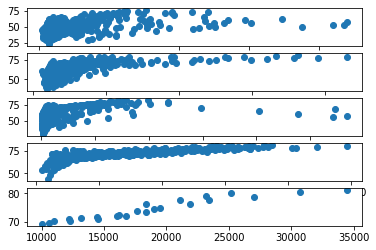

In [20]:


fig, ax = plt.subplots(5, 1)

for iCounter, (iName, iGroup) in enumerate(grp_df):
    #print(iCounter)
    ax[iCounter].scatter(iGroup['gdpPercap'], iGroup['lifeExp'])



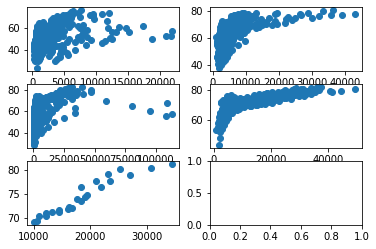

In [21]:
num_rows, num_cols = 3, 2

fig, ax = plt.subplots(num_rows, num_cols)

for iCounter, (iName, iGroup) in enumerate(grp_df):
    row_number = iCounter//2 # (iCounter - iCounter%2)/2
    ax[int(row_number), iCounter%2].scatter(iGroup['gdpPercap'], iGroup['lifeExp'])


Text(0.5, 0.98, 'My Title')

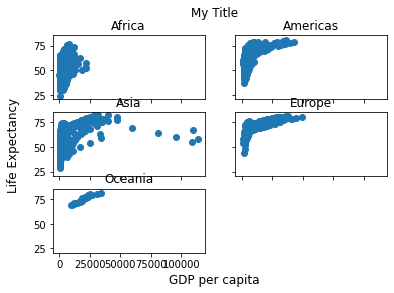

In [46]:
num_rows, num_cols = 3, 2

fig, ax = plt.subplots(num_rows, num_cols, sharey= True, sharex = True)

ax = ax.flatten()
#print(ax.shape)

for iCounter, (iName, iGroup) in enumerate(grp_df):
    ax[iCounter].scatter(iGroup['gdpPercap'], iGroup['lifeExp'])
    ax[iCounter].set_title(iName)

ax[5].axis('off')

fig.supylabel('Life Expectancy')
fig.supxlabel('GDP per capita')
fig.suptitle('My Title')

In [47]:
import matplotlib 
matplotlib.__version__

'3.4.3'

Text(0.02, 0.5, 'life expect.')

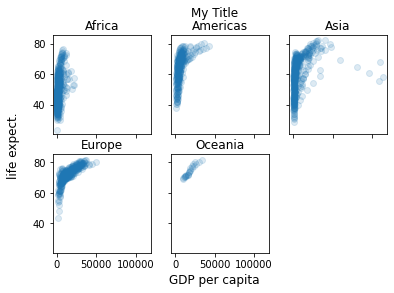

In [22]:
num_rows, num_cols = 2, 3

fig, ax = plt.subplots(num_rows, num_cols, 
                        sharex= True, sharey= True)

for iCounter, (iName, iGroup) in enumerate(grp_df):
    ax = ax.flatten()
    ax[iCounter].scatter(iGroup['gdpPercap'], iGroup['lifeExp'], alpha = 0.15)
    ax[iCounter].set_title('%s' %iName)
    # hide the last axis
ax[5].axis('off')
fig.suptitle('My Title')
fig.supxlabel('GDP per capita')
fig.supylabel('life expect.')


KeyError: 'Africa'

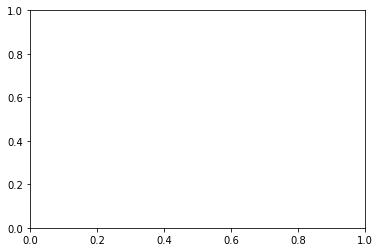

In [23]:
fig, ax = plt.subplots()

for iName, iGroup in grp_df:
    ax.plot(iGroup['year'], iGroup['pop'], label = iName, color = my_cols[iName])

ax.set_ylabel('Population in Millions', fontsize = 16)
ax.set_xlabel('year', fontsize = 16)

ax.legend(frameon = False)

plt.savefig('pop_plot.jpg', dpi = 300)